<a href="https://colab.research.google.com/github/LOVE-DOCTOR/Sentiment-Analysis-for-Drug-Recommender-System-using-NLP/blob/main/SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS BASED ON DRUG REVIEWS


## DATA CLEANING

**Importation of required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk

import datetime

from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import string
from string import punctuation


%matplotlib inline




from nltk.corpus import stopwords
from collections import Counter
import nltk
import string
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
    
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

from gensim.parsing.preprocessing import remove_stopwords

import pickle

pip install gensim


**Importation of the train and test dataset**

In [ ]:
train = pd.read_csv("drugs_train.csv")
test = pd.read_csv("drugs_test.csv")

Merging the two datasets

In [ ]:
df_train = pd.merge(train, test, how = "outer")

**Printing the train data**

In [ ]:
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


**Printing the first twenty rows of the train file**

In [ ]:
df_train.head(20)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [ ]:
df_train["drugName"].value_counts()

Levonorgestrel                       4930
Etonogestrel                         4421
Ethinyl estradiol / norethindrone    3753
Nexplanon                            2892
Ethinyl estradiol / norgestimate     2790
                                     ... 
Melpaque HP                             1
Cortisone                               1
Reyataz                                 1
Striant                                 1
Allergy DN PE                           1
Name: drugName, Length: 3671, dtype: int64

In [ ]:
new_df_cough = df_train.loc[(df_train["drugName"] == "Cough") & (df_train["rating"] > 8), ["uniqueID", "drugName", "condition", "review", "rating", "date", "usefulCount"]]

In [ ]:
new_df_cough.reset_index()

,index,uniqueID,drugName,condition,review,rating,date,usefulCount


In [ ]:
new_df_cough["drugName"].value_counts()

Series([], Name: drugName, dtype: int64)

In [ ]:
new_df_depression = df_train.loc[(df_train["condition"] == "Bipolar Disode") & (df_train["rating"] > 8), ["drugName", "condition", "review", "rating", "usefulCount"]]

In [ ]:
new_df_depression.reset_index()

,index,drugName,condition,review,rating,usefulCount


In [ ]:
new_df_depression["drugName"].value_counts()

Series([], Name: drugName, dtype: int64)

# DATA VISUALIZATION

**WORDCLOUD VISUALIZATION FOR DRUG NAMES**

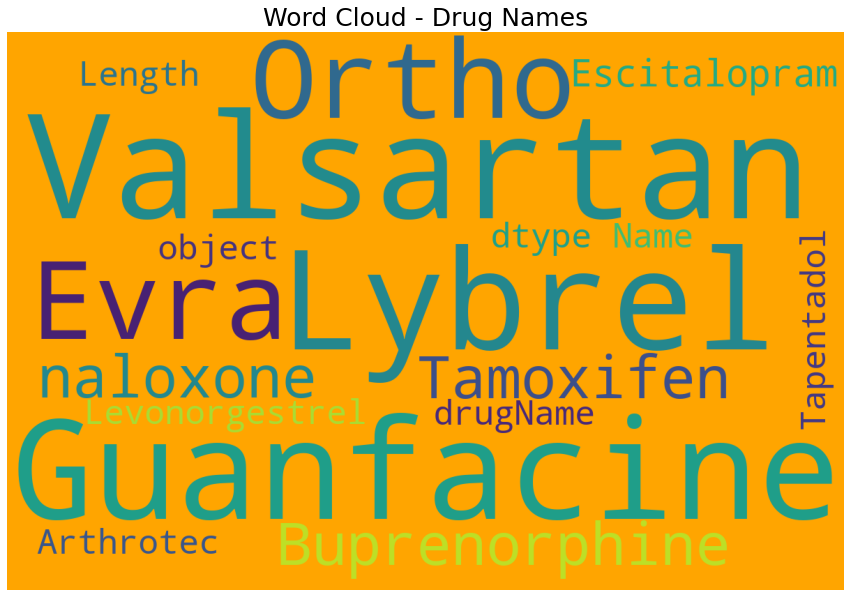

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(df_train['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**WORDCLOUD VISUALIZATION FOR REVIEWS**

In [ ]:
wordcloud = WordCloud(background_color = "lightblue", stopwords = stopwords, width = 1200, height = 800).generate(str(df_train["review"]))

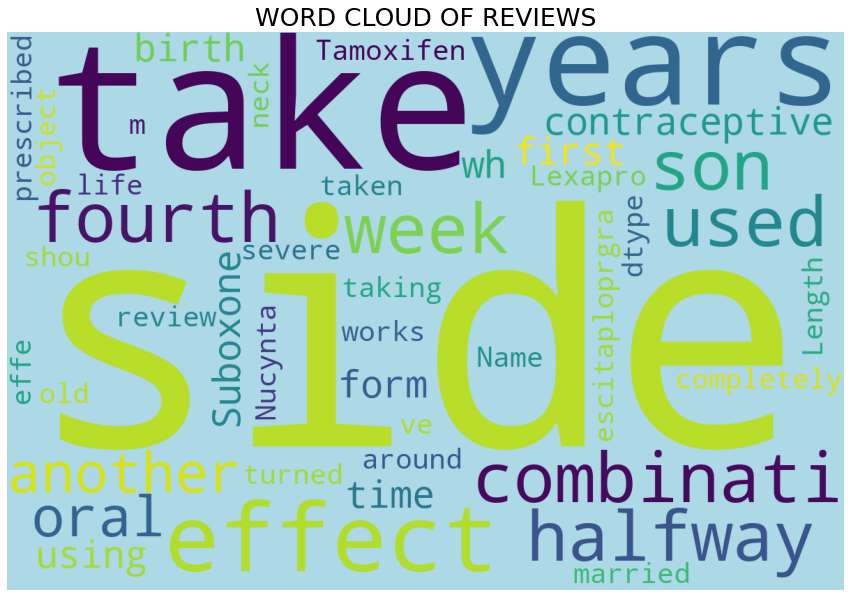

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## FEATURE ENGINEERING

**Converting the dates to datetime readable by python**

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [ ]:
df_train['day'] =  df_train['date'].dt.day
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year

In [ ]:
df_train.drop(["date"], axis = 1, inplace = True)

**Creating a new column called Review_Sentiment**

In [ ]:
df_train.loc[(df_train['rating'] >= 8), 'Review_Sentiment'] = 1
df_train.loc[(df_train['rating'] < 8), 'Review_Sentiment'] = 0

In [ ]:
df_train["Review_Sentiment"].value_counts()

1.0    129759
0.0     85304
Name: Review_Sentiment, dtype: int64

In [ ]:
df_train

,uniqueID,drugName,condition,review,rating,usefulCount,day,month,year,Review_Sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,20,5,2012,1.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,27,4,2010,1.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,14,12,2009,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,3,11,2015,1.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,27,11,2016,1.0
...,...,...,...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43,13,9,2014,1.0
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,8,10,2016,1.0
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7,15,11,2010,1.0
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,20,28,11,2011,0.0


**Wordcloud for positive reviews**

In [ ]:
positive_sentiments = " ".join([text for text in df_train['review'][df_train['Review_Sentiment'] == 1]])


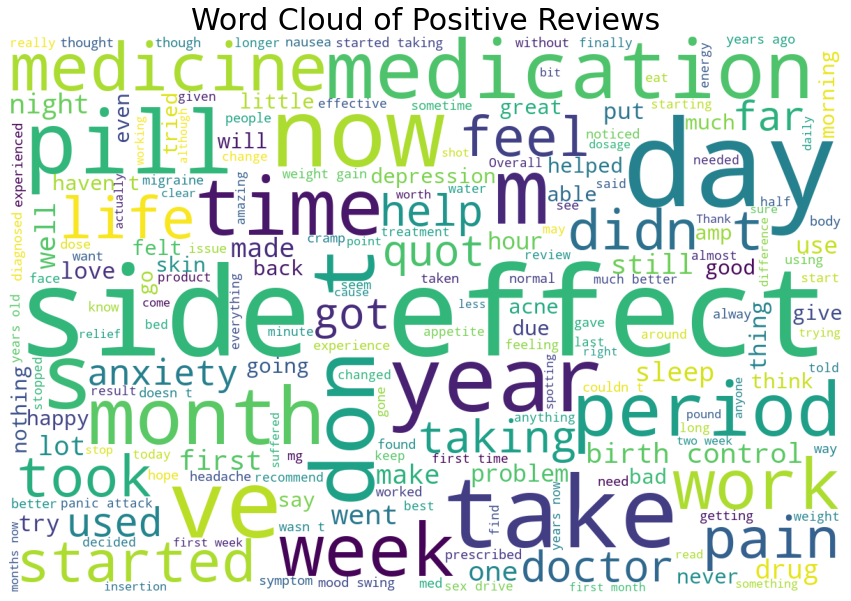

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**Wordcloud for negative reviews**

In [ ]:
negative_sentiments = " ".join([text for text in df_train['review'][df_train['Review_Sentiment'] == 0]])


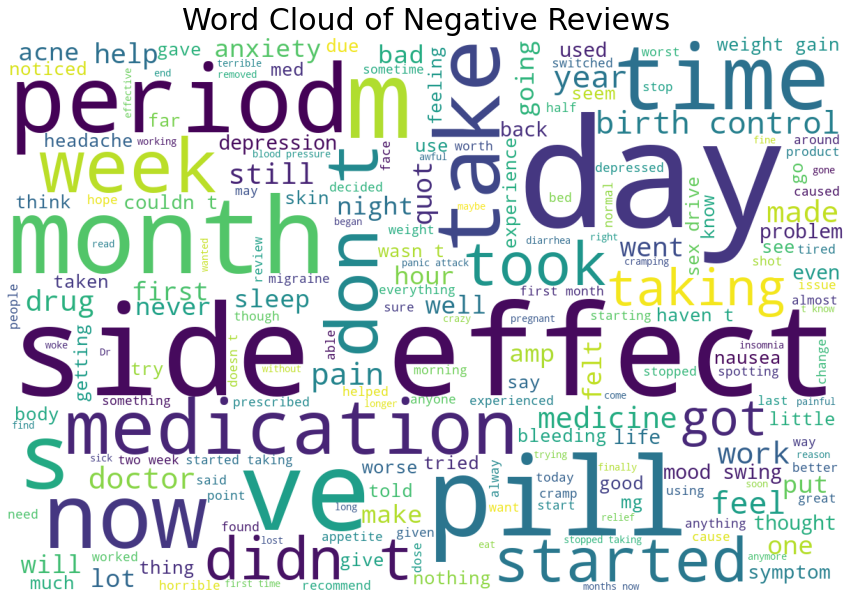

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# FIXING MIXING VALUES

**Checking the information of the train and test data to check for Datatypes of columns and missing values**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 215062
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uniqueID          215063 non-null  int64  
 1   drugName          215063 non-null  object 
 2   condition         213869 non-null  object 
 3   review            215063 non-null  object 
 4   rating            215063 non-null  int64  
 5   usefulCount       215063 non-null  int64  
 6   day               215063 non-null  int64  
 7   month             215063 non-null  int64  
 8   year              215063 non-null  int64  
 9   Review_Sentiment  215063 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 18.0+ MB


**Creating a function to append same datatypes to a list and calling the function on the train and test data**

In [ ]:
num_col = []
cat_col = []
def make_num_and_cat(df):
    for i in df:
        if df[i].dtypes == object:
            cat_col.append(i)
        else:
            num_col.append(i)


In [ ]:
make_num_and_cat(df_train)


**Checking the lists**

In [ ]:
cat_col

['drugName', 'condition', 'review']

In [ ]:
num_col

['uniqueID',
 'rating',
 'usefulCount',
 'day',
 'month',
 'year',
 'Review_Sentiment']

**Dropping all the rows with missing values because it's not advisable to fill missing values for condition**

In [ ]:
df_train.dropna(how = "any", inplace = True)


**Confirming the rows which contain missing values have been dropped**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 215062
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uniqueID          213869 non-null  int64  
 1   drugName          213869 non-null  object 
 2   condition         213869 non-null  object 
 3   review            213869 non-null  object 
 4   rating            213869 non-null  int64  
 5   usefulCount       213869 non-null  int64  
 6   day               213869 non-null  int64  
 7   month             213869 non-null  int64  
 8   year              213869 non-null  int64  
 9   Review_Sentiment  213869 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 17.9+ MB


In [ ]:
df_train["condition"] = df_train["condition"].str.replace('Bipolar Disode', 'Bipolar Disorder')

In [ ]:
df_train["condition"].value_counts().to_frame()



,condition
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435
...,...
Systemic Candidiasis,1
Wilson's Disease,1
unctional Gastric Disorde,1
Sepsis,1


In [ ]:
substring = "users found this comment helpful."

In [ ]:
bytes_first = [j for j in df_train["condition"] if substring in j]

for i in bytes_first:
    df_train.drop(i, axis = 0, inplace = True)

In [ ]:
df_train["condition"].value_counts().to_frame()



,condition
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435
...,...
Systemic Candidiasis,1
Wilson's Disease,1
unctional Gastric Disorde,1
Sepsis,1


In [ ]:
pd. set_option('display.max_rows', 900)

## NLP

In [ ]:
def text_cleaning(review):
    
    
    lower = review.str.lower()
    pattern_remove = lower.str.replace("&#039;", "")
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
   
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$',' ')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    twomore = multiw_remove.str.replace(r'\.{2,}',' ')
    
    #Removing numbers
    numbers = twomore.str.replace(r'\d+',' ')
    
    #Removing special characters
    dataframe = numbers.str.replace(r'[^a-zA-Z0-9.,!?/:;\"\'\s]', ' ')
    return dataframe
    #text = ''.join(c for c in dataframe if c not in punctuation)
    
                          
    
    
                                                                 
    return(dataframe)                                                             
                                                                 

In [ ]:
df_train["review_clean"] = text_cleaning(df_train["review"])

In [ ]:
df_train

,uniqueID,drugName,condition,review,rating,usefulCount,day,month,year,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,20,5,2012,1.0,it has no side effect i take it in combinatio...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,27,4,2010,1.0,my son is halfway through his fourth week of ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,14,12,2009,0.0,i used to take another oral contraceptive whi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,3,11,2015,1.0,this is my first time using any form of birth...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,27,11,2016,1.0,suboxone has completely turned my life around...
...,...,...,...,...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43,13,9,2014,1.0,i have taken tamoxifen for years side effec...
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,8,10,2016,1.0,ive been taking lexapro escitaploprgram since...
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7,15,11,2010,1.0,im married years old and i have no kids tak...
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,20,28,11,2011,0.0,i was prescribed nucynta for severe neck shou...


**Removing stopwords**

In [ ]:
df_train['review_clean'] = df_train['review_clean'].apply(lambda x: remove_stopwords(x))

In [ ]:
lemmatizer = WordNetLemmatizer() 

In [ ]:

df_train["review_clean"] = df_train["review_clean"].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
    

In [ ]:
df_train

,uniqueID,drugName,condition,review,rating,usefulCount,day,month,year,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,20,5,2012,1.0,effect combination bystolic mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,27,4,2010,1.0,son halfway fourth week intuniv concerned bega...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,14,12,2009,0.0,oral contraceptive pill cycle happy light peri...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,3,11,2015,1.0,time form birth control im glad went patch mon...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,27,11,2016,1.0,suboxone completely turned life feel healthier...
...,...,...,...,...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43,13,9,2014,1.0,taken tamoxifen year effect severe sweating de...
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,8,10,2016,1.0,ive taking lexapro escitaploprgram february id...
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7,15,11,2010,1.0,im married year old kid taking pill hassle dec...
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,20,28,11,2011,0.0,prescribed nucynta severe neck shoulder pain t...


In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df_train["vaderReviewScore_clean"] = df_train["review_clean"].apply(lambda x:analyzer.polarity_scores(x)['compound'])

In [ ]:
df_train

,uniqueID,drugName,condition,review,rating,usefulCount,day,month,year,Review_Sentiment,review_clean,vaderReviewScore_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,20,5,2012,1.0,effect combination bystolic mg fish oil,0.0000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,27,4,2010,1.0,son halfway fourth week intuniv concerned bega...,0.9169
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,14,12,2009,0.0,oral contraceptive pill cycle happy light peri...,0.8176
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,3,11,2015,1.0,time form birth control im glad went patch mon...,0.5267
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,27,11,2016,1.0,suboxone completely turned life feel healthier...,0.9344
...,...,...,...,...,...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43,13,9,2014,1.0,taken tamoxifen year effect severe sweating de...,-0.8225
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,8,10,2016,1.0,ive taking lexapro escitaploprgram february id...,0.8822
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7,15,11,2010,1.0,im married year old kid taking pill hassle dec...,-0.6999
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,20,28,11,2011,0.0,prescribed nucynta severe neck shoulder pain t...,-0.9260


In [ ]:
vader_sentiment = []

for i in df_train["vaderReviewScore_clean"]:
    if i >= 0.05:
        vader_sentiment.append("Positive")
    else:
        vader_sentiment.append("Negative")

In [ ]:
df_train["vader_sentiment"] = vader_sentiment

In [ ]:
df_train

,uniqueID,drugName,condition,review,rating,usefulCount,day,month,year,Review_Sentiment,review_clean,vaderReviewScore_clean,vader_sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27,20,5,2012,1.0,effect combination bystolic mg fish oil,0.0000,Negative
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192,27,4,2010,1.0,son halfway fourth week intuniv concerned bega...,0.9169,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17,14,12,2009,0.0,oral contraceptive pill cycle happy light peri...,0.8176,Positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10,3,11,2015,1.0,time form birth control im glad went patch mon...,0.5267,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37,27,11,2016,1.0,suboxone completely turned life feel healthier...,0.9344,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215058,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,43,13,9,2014,1.0,taken tamoxifen year effect severe sweating de...,-0.8225,Negative
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,11,8,10,2016,1.0,ive taking lexapro escitaploprgram february id...,0.8822,Positive
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,7,15,11,2010,1.0,im married year old kid taking pill hassle dec...,-0.6999,Negative
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,20,28,11,2011,0.0,prescribed nucynta severe neck shoulder pain t...,-0.9260,Negative


In [ ]:
df_train["vader_sentiment"].value_counts()

Negative    113573
Positive    100296
Name: vader_sentiment, dtype: int64

In [ ]:
df_train["vader_sentiment"].value_counts()

0    113573
1    100296
Name: vader_sentiment, dtype: int64

In [ ]:
df_train.dropna(how = "any", inplace = True)


df_train.drop(df_train[df_train['rating'] < 7].index, inplace = True)

In [ ]:
df_train.drop(['review'], axis = 1, inplace = True)

In [ ]:
df_train["drugName"].value_counts()

Levonorgestrel                       4896
Etonogestrel                         4402
Ethinyl estradiol / norethindrone    3619
Nexplanon                            2892
Ethinyl estradiol / norgestimate     2682
                                     ... 
Hemin                                   1
Melpaque HP                             1
Cortisone                               1
Reyataz                                 1
Allergy DN PE                           1
Name: drugName, Length: 3667, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213869 entries, 0 to 215062
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   uniqueID                213869 non-null  int64  
 1   drugName                213869 non-null  object 
 2   condition               213869 non-null  object 
 3   rating                  213869 non-null  int64  
 4   usefulCount             213869 non-null  int64  
 5   day                     213869 non-null  int64  
 6   month                   213869 non-null  int64  
 7   year                    213869 non-null  int64  
 8   Review_Sentiment        213869 non-null  float64
 9   review_clean            213869 non-null  object 
 10  vaderReviewScore_clean  213869 non-null  float64
 11  vader_sentiment         213869 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 21.2+ MB


In [ ]:
tfidf = TfidfVectorizer(ngram_range = (1, 4))


In [ ]:
x = tfidf.fit_transform(df_train['review_clean'])

In [ ]:
x

<213869x8855452 sparse matrix of type '<class 'numpy.float64'>'
	with 27629774 stored elements in Compressed Sparse Row format>

In [ ]:
lab = LabelEncoder()

In [ ]:
df_train["vader_sentiment"] = lab.fit_transform(df_train["vader_sentiment"])

In [ ]:
y = df_train['vader_sentiment']

In [ ]:

X = x


In [ ]:
X

<213869x8855452 sparse matrix of type '<class 'numpy.float64'>'
	with 27629774 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(213869, 8855452)

In [ ]:
y.shape

(213869,)

In [ ]:
y

0         0
1         1
2         1
3         1
4         1
         ..
215058    0
215059    1
215060    0
215061    0
215062    0
Name: vader_sentiment, Length: 213869, dtype: int32

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
normalize = Normalizer()

In [ ]:
X_train = normalize.fit_transform(X_train)

In [ ]:
X_test = normalize.fit_transform(X_test)

# SUPPORT VECTOR CLASSIFIER

In [ ]:
model = LinearSVC('l2')

In [ ]:
model.fit(X_train, y_train)

LinearSVC()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
new_pred = pd.DataFrame()

In [ ]:
new_pred["Prediction"] = prediction

In [ ]:
support = print(accuracy_score(y_test, prediction))

0.9584794501332585


# MODEL SAVING AND TESTING

In [ ]:
pickle_out = open("sentmodel.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("vector.sav", "wb")
pickle.dump(tfidf, pickle_out)
pickle_out.close()

In [ ]:
loaded_model = pickle.load(open("sentmodel.pkl", 'rb'))

In [ ]:
loaded_vectorizer = pickle.load(open("vector.sav", 'rb'))

Negative 0


Positive 1

In [ ]:
test_review = [input("How do you feel after using your drug: ")]
print(loaded_model.predict(loaded_vectorizer.transform(test_review)))

How do you feel after using your drug: fine
[1]
